In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\rohit\AppData\Local\Temp\ipykernel_1108\265554930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('crop.csv')

In [5]:
df.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [6]:
df.shape

(777, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass             7

All values are numerical columns and target column is yeild which is also numeric and continous thereby making this a regression problem

In [8]:
df.isna().sum()

Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

No missing Values in dataset

In [9]:
df.describe()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,388.000000,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,224.444871,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,194.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,388.000000,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,582.000000,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,776.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


In [10]:
df.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [11]:
df.shape

(777, 18)

At a glance the columns clonesize, honeybee, bumbles, andrena, osmia seem to have constant values throughout the dataset. Lets see if the observation is correct.

In [12]:
df_consts = pd.DataFrame({'clonesize':df.clonesize.nunique(),'honeybee':df.honeybee.nunique(),'bumbles':df.bumbles.nunique(),'andrena':df.andrena.nunique(),'osmia':df.osmia.nunique()},index=[1])

In [13]:
df_consts

,clonesize,honeybee,bumbles,andrena,osmia
1,6,7,10,12,12


It would seem that the observation was wrong and infact the columns have several different unique values in them

In [14]:
df.clonesize.unique()

array([37.5, 25. , 12.5, 20. , 10. , 40. ])

In [15]:
df_clone_yeild = df[['clonesize','yield']]
df_clone_yeild.head()

,clonesize,yield
0,37.5,3813.165795
1,37.5,4947.605663
2,37.5,3866.798965
3,37.5,4303.943030
4,37.5,3436.493543


In [16]:
df_clone_yeild['yield'].describe()

count     777.000000
mean     6012.849165
std      1356.955318
min      1637.704022
25%      5124.854901
50%      6107.382466
75%      7022.189731
max      8969.401842
Name: yield, dtype: float64

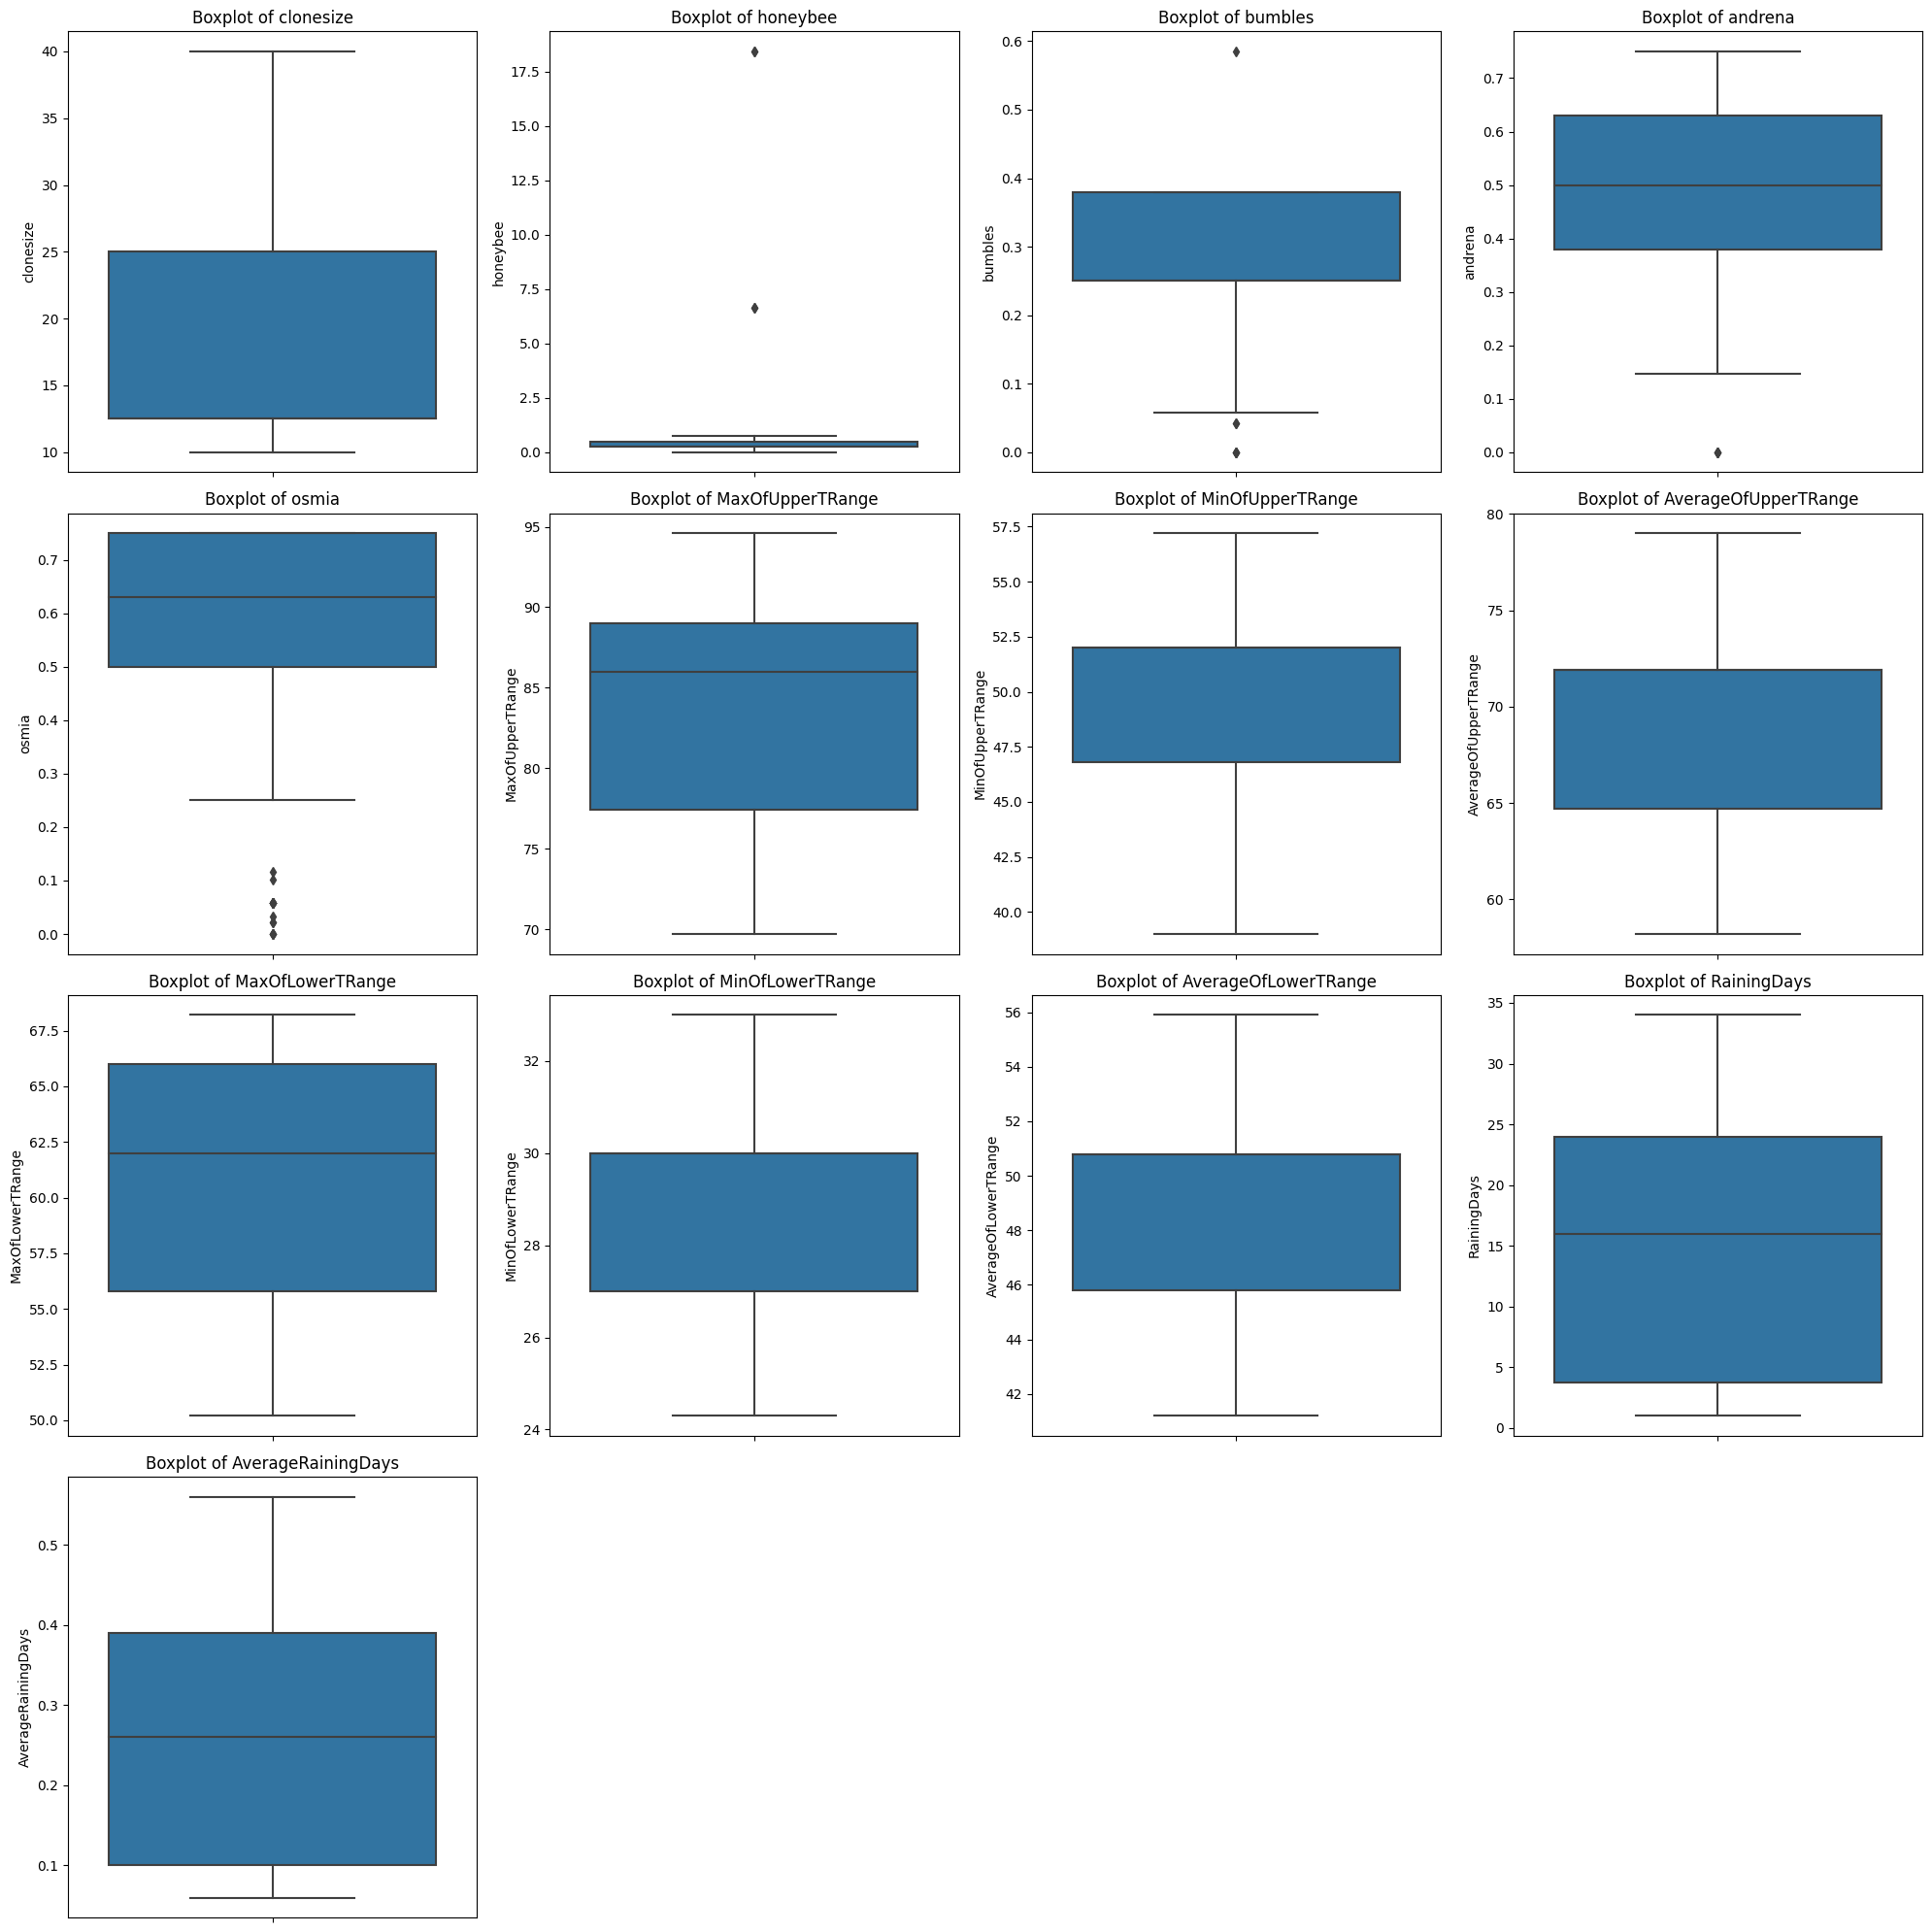

In [17]:
cols_to_plot = ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'MaxOfUpperTRange', 
                'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 
                'MinOfLowerTRange', 'AverageOfLowerTRange', 'RainingDays', 
                'AverageRainingDays']

fig, ax = plt.subplots(4, 4, figsize=(20, 20))
ax = ax.flatten()

for i, col in enumerate(cols_to_plot):
    sns.boxplot(data=df, y=col, ax=ax[i])
    ax[i].set_title(f'Boxplot of {col}')

for j in range(i+1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()


There are outliers in the columns of bumbles, andrena, honeybee and osmia

Removing outliers from those colns by removing them from the dataset

In [18]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    #df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    #return df
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

cols_to_process = ['honeybee','bumbles','andrena','osmia']
for col in cols_to_process:
    df = remove_outliers(df, col)

In [19]:
df.shape

(759, 18)

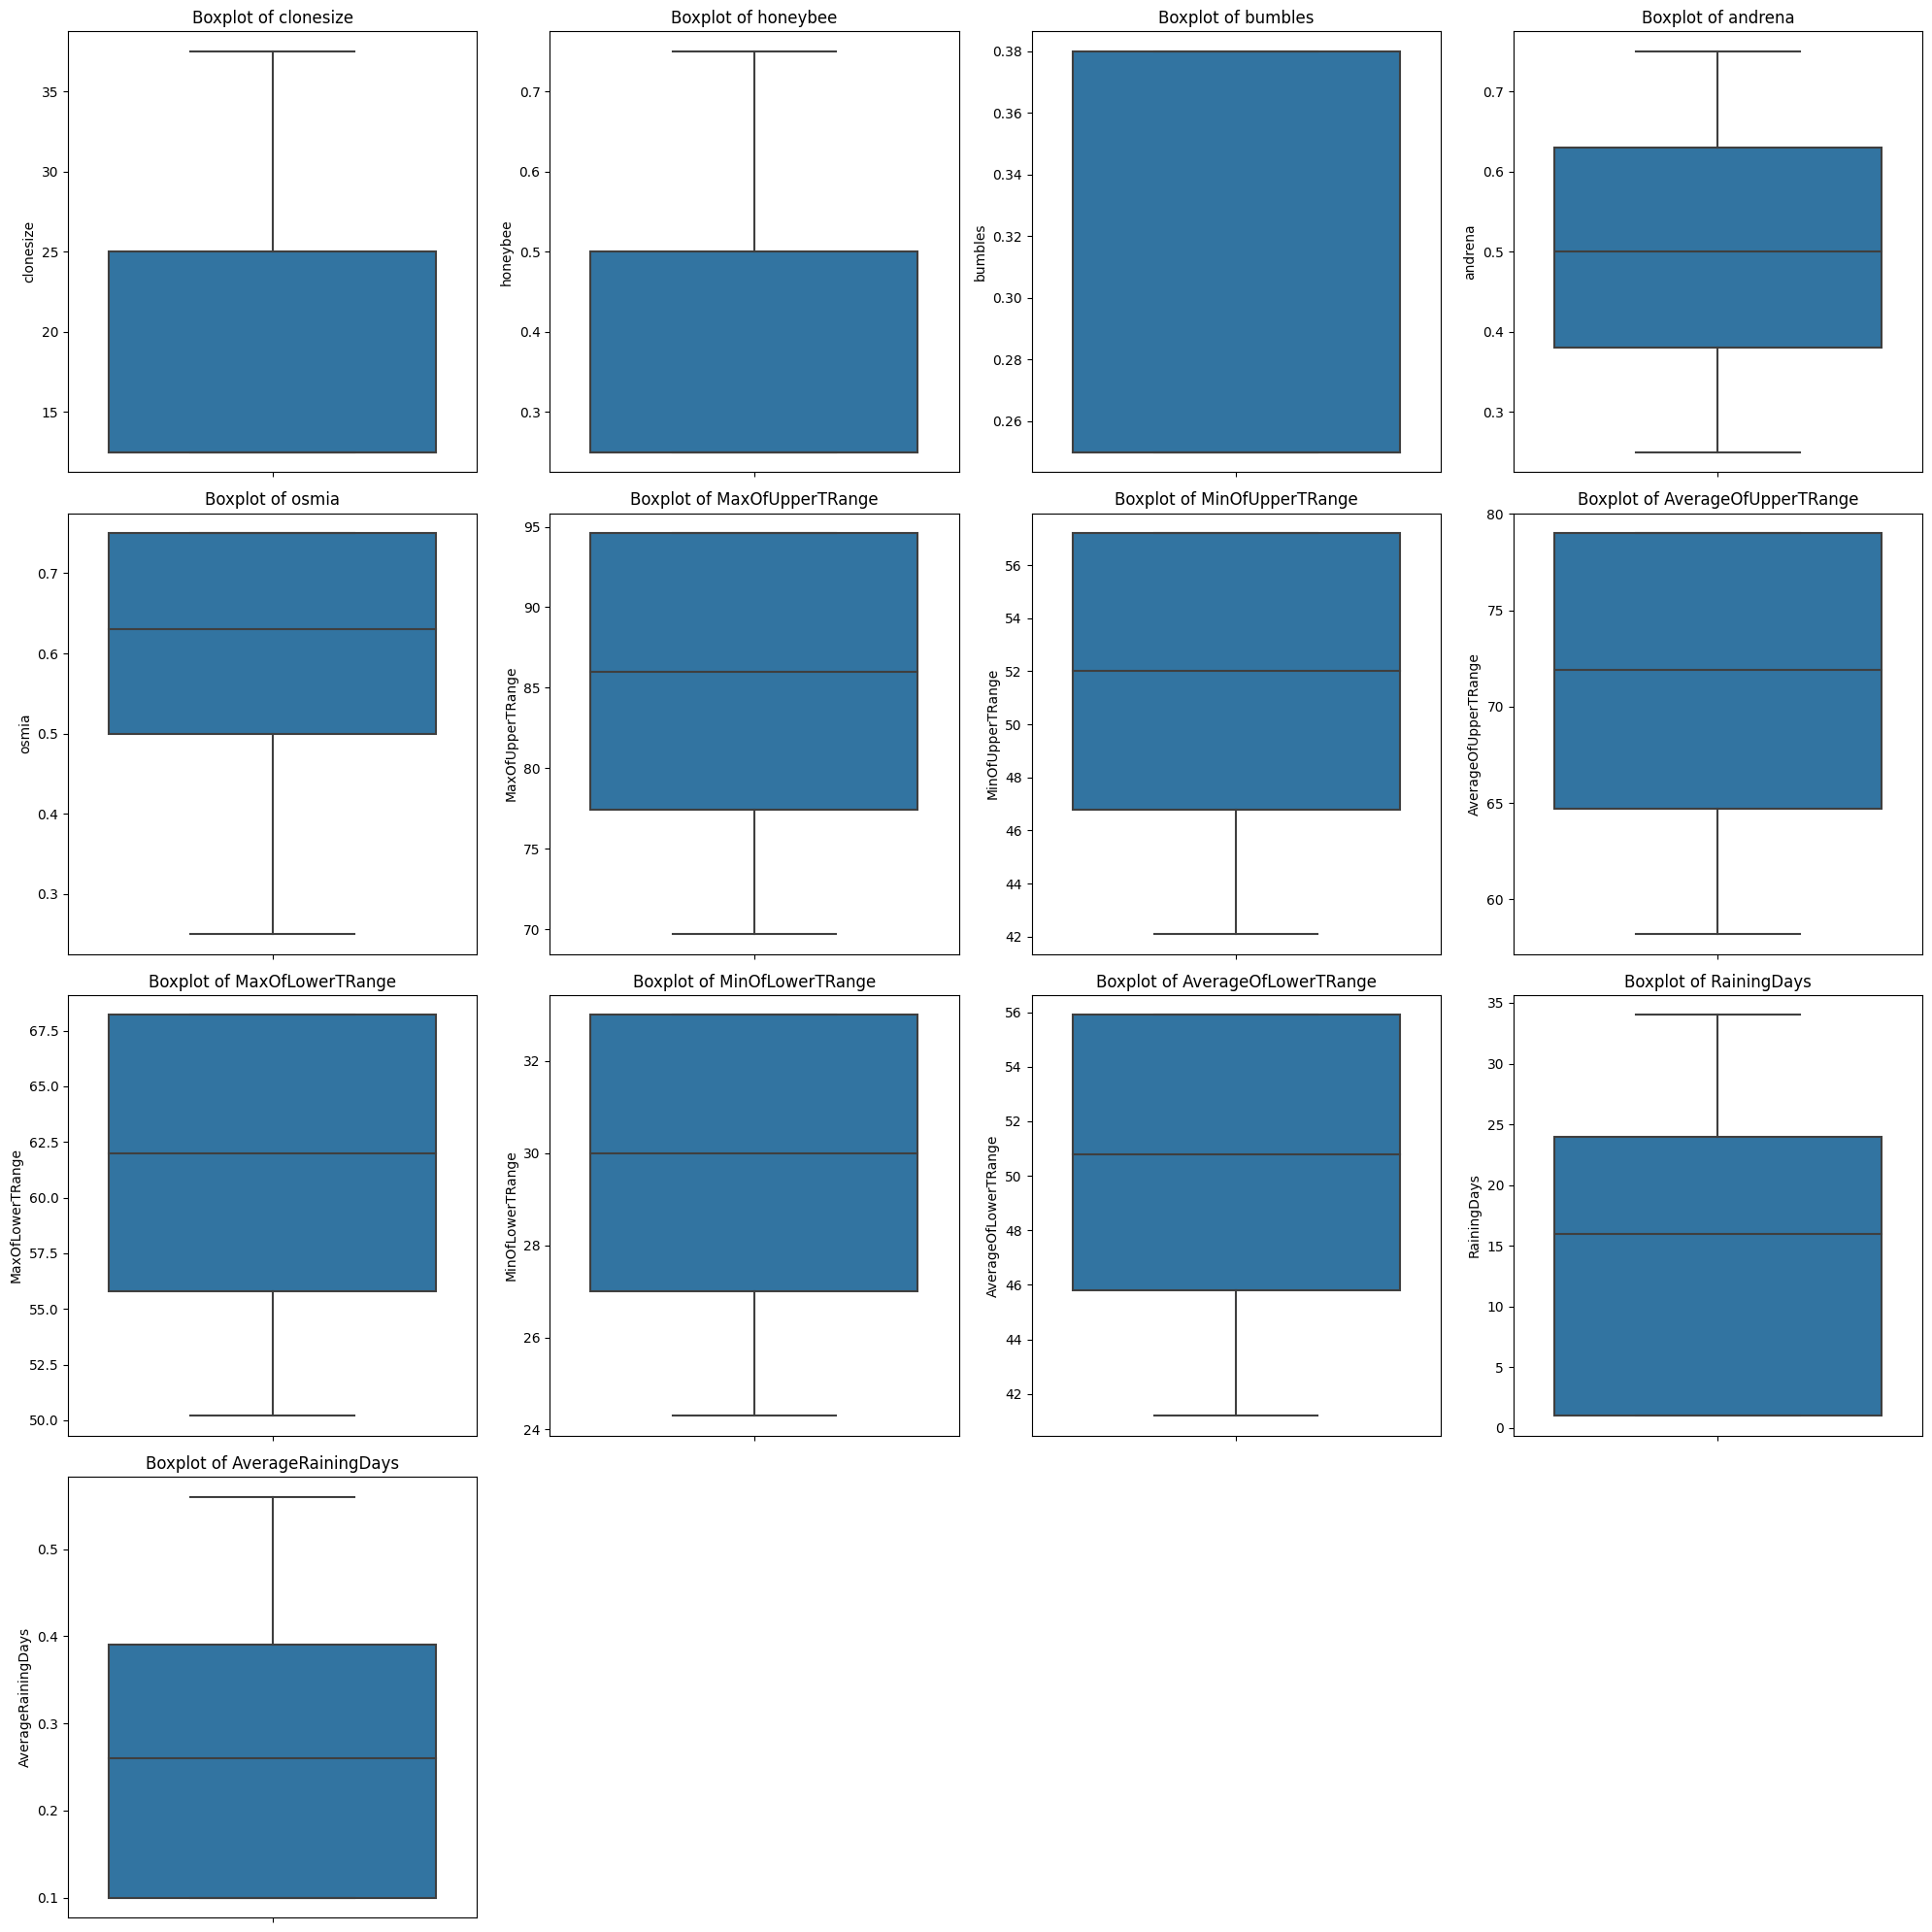

In [20]:
cols_to_plot = ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'MaxOfUpperTRange', 
                'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 
                'MinOfLowerTRange', 'AverageOfLowerTRange', 'RainingDays', 
                'AverageRainingDays']

fig, ax = plt.subplots(4, 4, figsize=(20, 20))
ax = ax.flatten()

for i, col in enumerate(cols_to_plot):
    sns.boxplot(data=df, y=col, ax=ax[i])
    ax[i].set_title(f'Boxplot of {col}')

for j in range(i+1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()


No Outliers left

Minimum yeild is 1637.704 and max yield is 8969.401 with median value as 6107.382 also the mean and median of yeild are very close so very less outliers are in the yeild column

Now lets break the yield column into 10 buckets each of size 8 to analysize what is the distribution of clonesize wrt yield range

In [21]:
labels = ["{0} - {1}".format(i, i + 799) for i in range(1600, 9000, 800)]
df['yeild_range'] = pd.cut(df['yield'],np.arange(1600,9800,800),labels=labels)

<Axes: xlabel='yeild_range'>

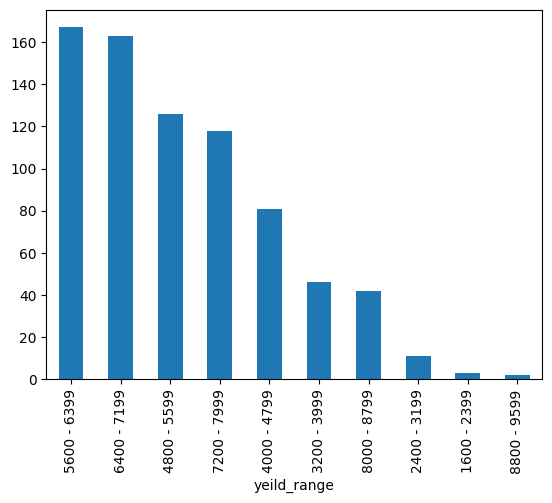

In [22]:
df['yeild_range'].value_counts().plot.bar()

Overall the amount of crop yeild lies in the range of 5600-6399

<Axes: xlabel='clonesize'>

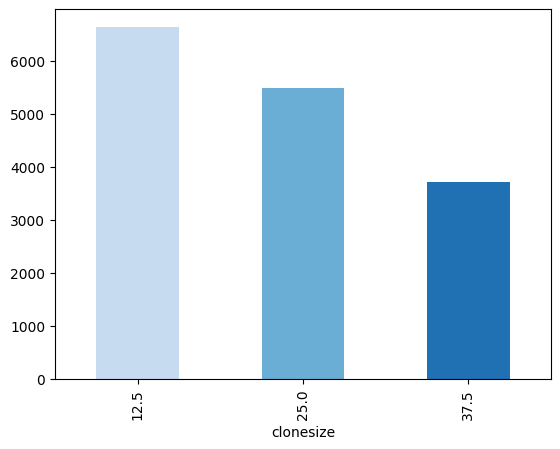

In [23]:
palette = sns.color_palette("Blues", len(df['clonesize'].unique()))
df.groupby(by='clonesize')['yield'].mean().plot.bar(color=palette)

Overall clonesize 12.5 gives highest avg yield

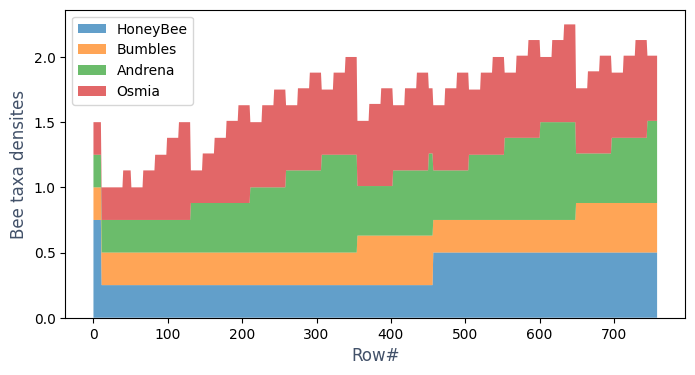

In [24]:
plt.figure(figsize=(8,4))
plt.stackplot(df['Row#'], df.honeybee, df.bumbles, df.andrena, df.osmia, labels=['HoneyBee', 'Bumbles', 'Andrena', 'Osmia'], alpha=0.7)
plt.legend(loc='upper left')
plt.xlabel('Row#', fontsize= 12).set_color('#425169')
plt.ylabel('Bee taxa densites', fontsize= 12).set_color('#425169')

Most density fluctuation was observed in Osmia followed by Andrena, Bumbles and Honeybee

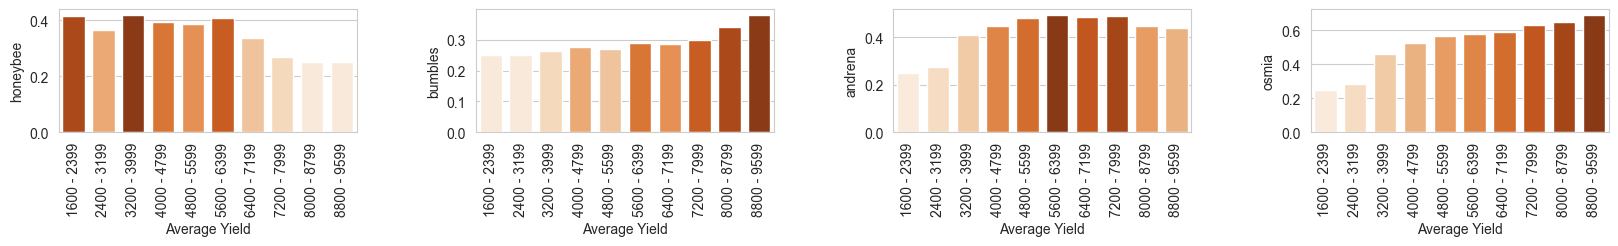

In [25]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(20, 4))
fig.subplots_adjust(wspace=0.4, hspace = 0.5)

bees = ['honeybee', 'bumbles', 'andrena', 'osmia']
yield_bee = df.groupby(['yeild_range'])[bees].mean().reset_index()

for i, col in enumerate(bees):
    plt.subplot(2, 4 ,i+1)
    sns.barplot(yield_bee, x='yeild_range', y = col, palette = 'Oranges', hue=col, dodge=False, width=0.75)
    plt.legend().set_visible(False)
    plt.xlabel('Average Yield')
    plt.xticks(rotation=90)

None of the bee species have a particular relationship with yield ranges other that bumbles and osmia who seem to have a almost linear relationship but it cant be said for sure that they have a linear relationship unless a scatter plot is made between the species and yield (target)

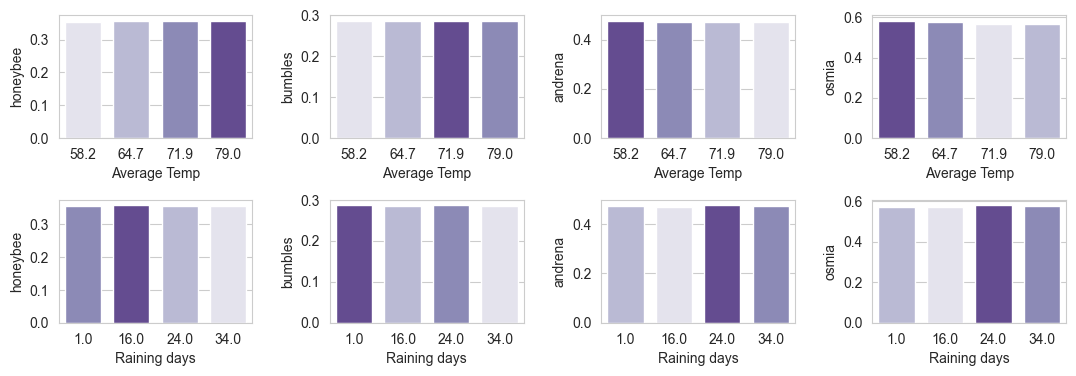

In [26]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(13, 4))
fig.subplots_adjust(wspace=0.4, hspace = 0.5)

bees = ['honeybee', 'bumbles', 'andrena', 'osmia']
temp_bee = df.groupby(['AverageOfUpperTRange'])[bees].mean().reset_index()
rain_bee = df.groupby(['RainingDays'])[bees].mean().reset_index()

for i, col in enumerate(bees):
    plt.subplot(2, 4 ,i+1)
    sns.barplot(temp_bee, x='AverageOfUpperTRange', y = col, palette = 'Purples', hue=col, dodge=False, width=0.75)
    plt.legend().set_visible(False)
    plt.xlabel('Average Temp')
    
for i, col in enumerate(bees):
    plt.subplot(2, 4 ,i+5)
    sns.barplot(rain_bee, x='RainingDays', y = col, palette = 'Purples', hue=col, dodge=False, width=0.75)
    plt.legend().set_visible(False)
    plt.xlabel('Raining days')

The natural factors of weather such as temperature and rain dont seem to affect the bees. This can be because the data was actually created artificially from a simulation environment and not taken from real life

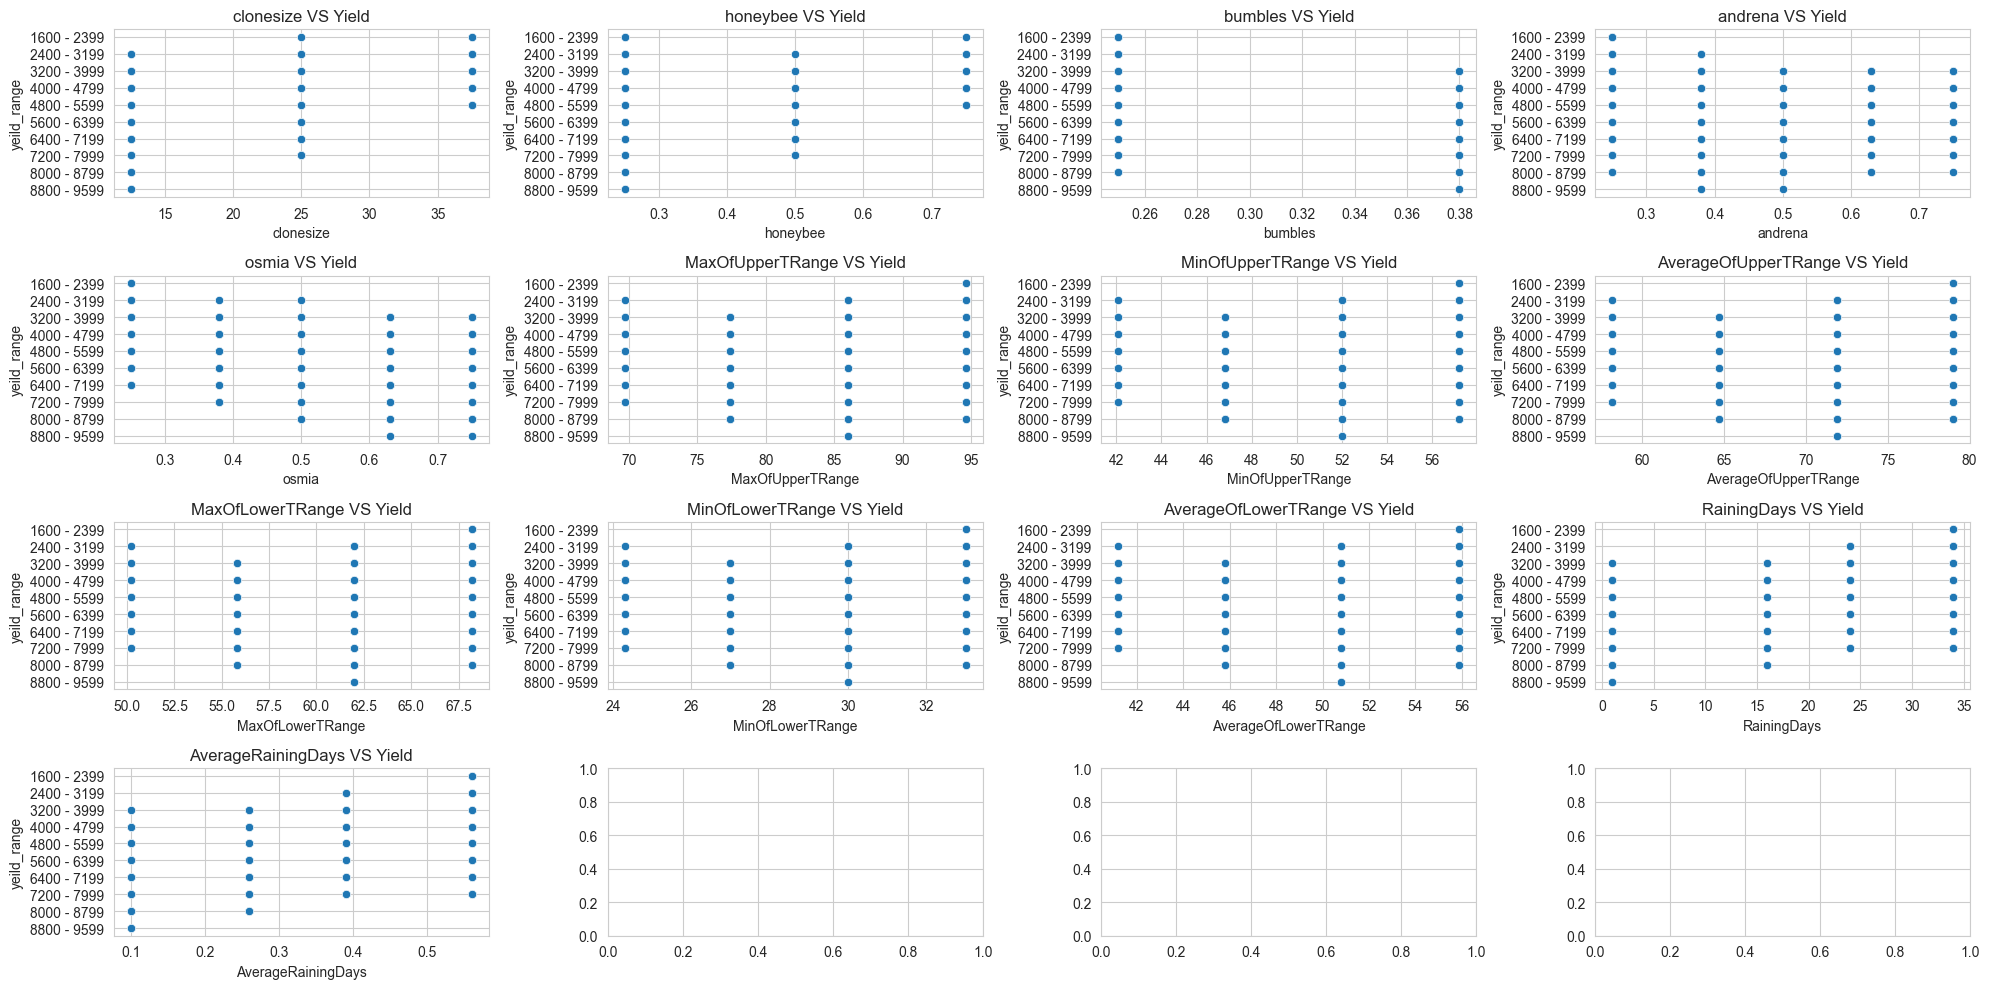

In [27]:
fig, ax = plt.subplots(4,4,figsize=(20,10))
ax = ax.flatten()
new_cols = ['clonesize','honeybee','bumbles','andrena','osmia','MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange','MinOfLowerTRange', 'AverageOfLowerTRange', 'RainingDays', 'AverageRainingDays']

for i,col in enumerate(new_cols):
    sns.scatterplot(data=df,x=col,y='yeild_range',ax=ax[i])
    ax[i].set_title(f'{col} VS Yield')
    plt.tight_layout()

plt.show()

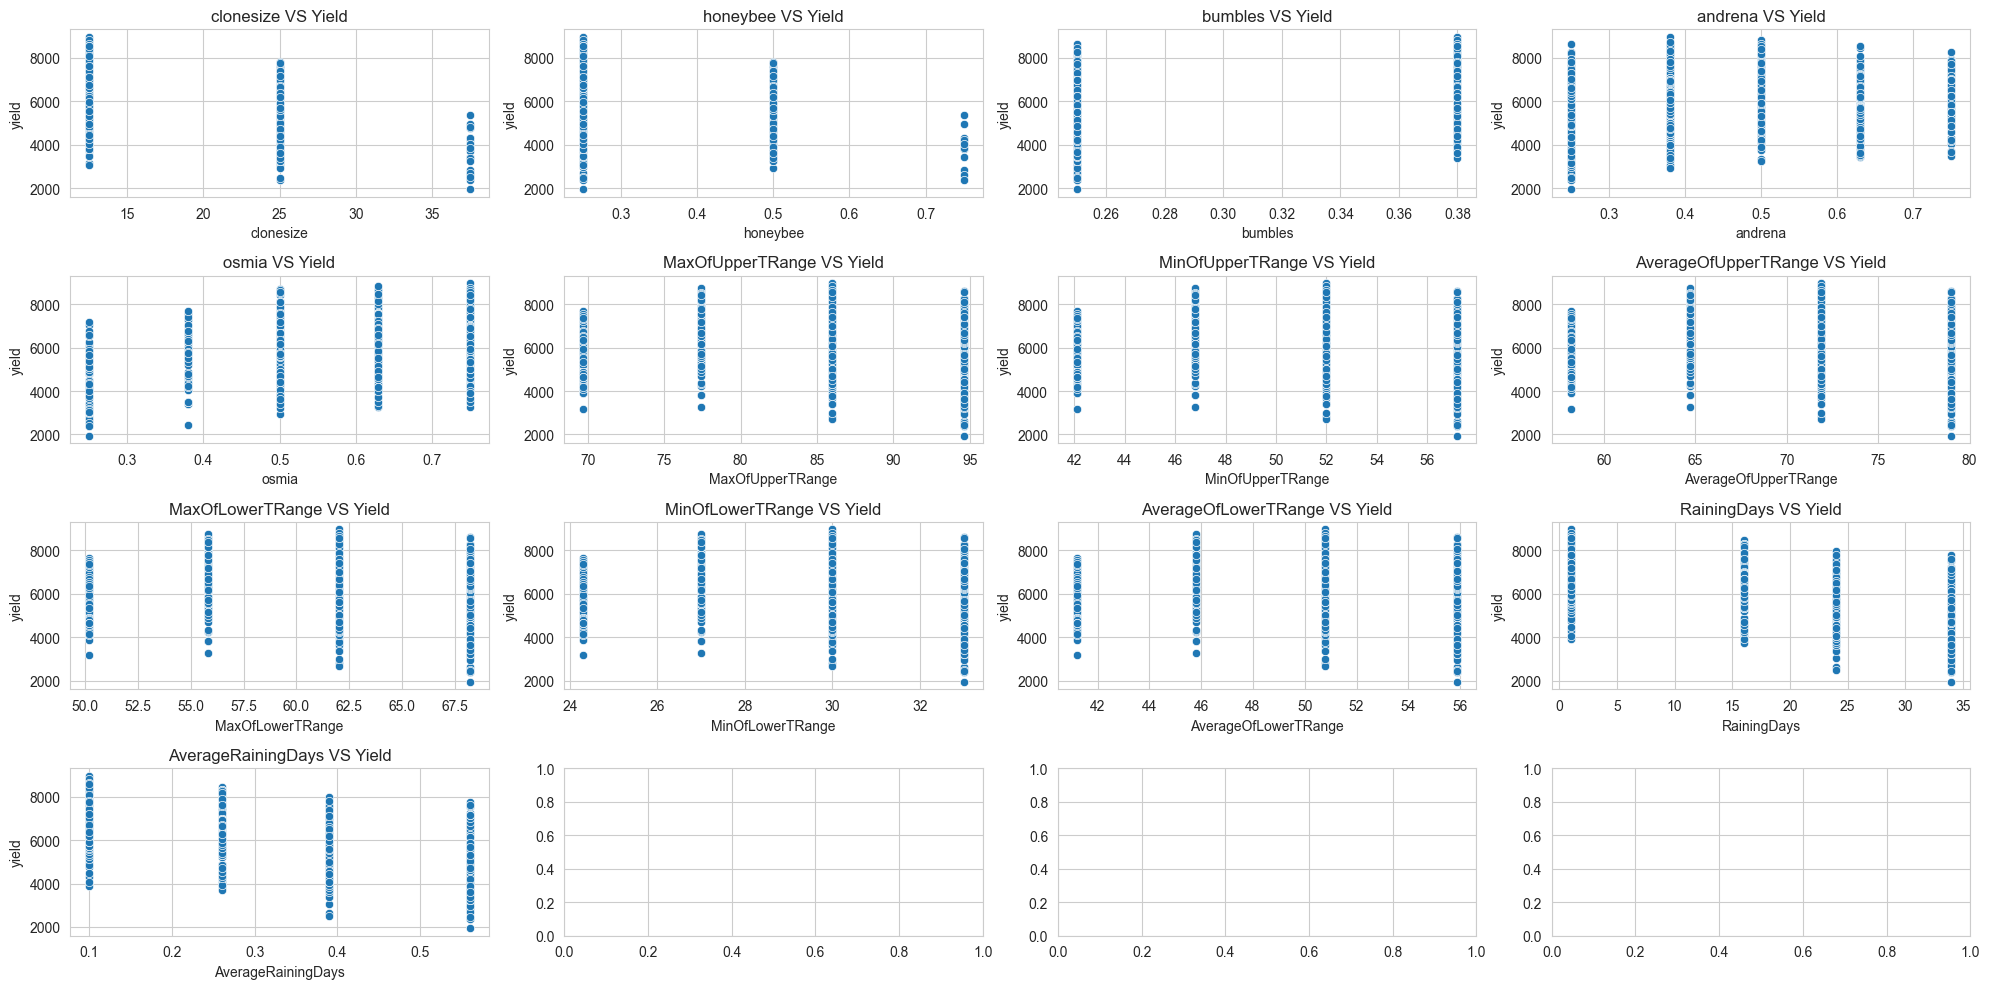

In [28]:
fig, ax = plt.subplots(4,4,figsize=(20,10))
ax = ax.flatten()
new_cols = ['clonesize','honeybee','bumbles','andrena','osmia','MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange','MinOfLowerTRange', 'AverageOfLowerTRange', 'RainingDays', 'AverageRainingDays']

for i,col in enumerate(new_cols):
    sns.scatterplot(data=df,x=col,y='yield',ax=ax[i])
    ax[i].set_title(f'{col} VS Yield')
    plt.tight_layout()

plt.show()

There is no discernable relation between the above columns and that of yield_range/yield therfore we cant use these columns to predict the target yield or the yield_range directly but a certain combination might work out 

In [38]:
df['mean_temp'] = df[['MaxOfUpperTRange','MinOfUpperTRange','MaxOfLowerTRange','MinOfLowerTRange']].mean(axis=1)

In [39]:
colns_usable = ['clonesize','honeybee','bumbles','andrena','osmia','mean_temp','AverageRainingDays']

Slope: -494.0288972504027 and intercept: 11387.387647129472


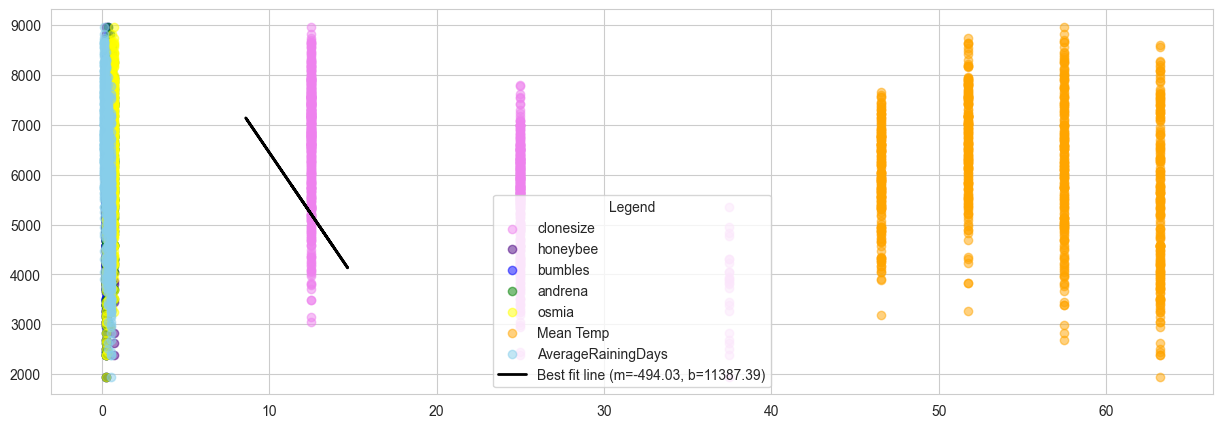

In [41]:
plt.figure(figsize=(15, 5))

plt.scatter(df['clonesize'], df['yield'], color='violet',alpha=0.5,label='clonesize')
plt.scatter(df['honeybee'], df['yield'], color='indigo',alpha=0.5,label='honeybee')
plt.scatter(df['bumbles'], df['yield'], color='blue',alpha=0.5,label='bumbles')
plt.scatter(df['andrena'], df['yield'], color='green',alpha=0.5,label='andrena')
plt.scatter(df['osmia'], df['yield'], color='yellow',alpha=0.5,label='osmia')
plt.scatter(df['mean_temp'], df['yield'], color='orange',alpha=0.5,label='Mean Temp')
plt.scatter(df['AverageRainingDays'],df['yield'], color='skyblue',alpha=0.5,label='AverageRainingDays')

X_combined = df[colns_usable].mean(axis=1).values.reshape(-1, 1)
m, b = np.polyfit(X_combined.flatten(), df['yield'].values, 1)
y_pred = m * X_combined + b
print(f'Slope: {m} and intercept: {b}')

plt.plot(X_combined, y_pred, color='black', linewidth=2, label=f'Best fit line (m={m:.2f}, b={b:.2f})')

plt.legend(title="Legend", loc='best')

plt.show()

Aggregation using mean

Slope: -494.02889725040296 and intercept: 11387.387647129466


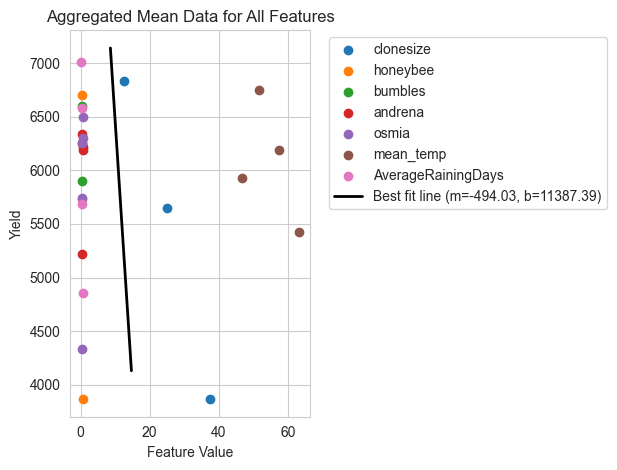

In [42]:
aggregated_df = df.groupby(colns_usable).agg({'yield': 'mean'}).reset_index()

aggregated_data = {}
for col in colns_usable:
    aggregated_data[col] = df.groupby(col).agg({'yield': 'median'}).reset_index()

for col in colns_usable:
    plt.scatter(aggregated_data[col][col], aggregated_data[col]['yield'], label=col)

plt.title('Aggregated Mean Data for All Features')
plt.xlabel('Feature Value')
plt.ylabel('Yield')

X_combined = aggregated_df[colns_usable].mean(axis=1).values.reshape(-1, 1)
m, b = np.polyfit(X_combined.flatten(), aggregated_df['yield'].values, 1)
y_pred = m * X_combined + b
print(f'Slope: {m} and intercept: {b}')

plt.plot(X_combined, y_pred, color='black', linewidth=2, label=f'Best fit line (m={m:.2f}, b={b:.2f})')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Aggregation using median

Slope: -494.02889725040296 and intercept: 11387.387647129466


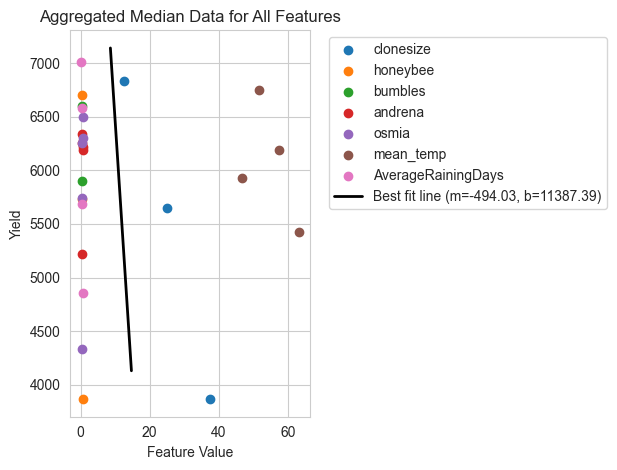

In [43]:
aggregated_df = df.groupby(colns_usable).agg({'yield': 'median'}).reset_index()

aggregated_data = {}
for col in colns_usable:
    aggregated_data[col] = df.groupby(col).agg({'yield': 'median'}).reset_index()

for col in colns_usable:
    plt.scatter(aggregated_data[col][col], aggregated_data[col]['yield'], label=col)

plt.title('Aggregated Median Data for All Features')
plt.xlabel('Feature Value')
plt.ylabel('Yield')

X_combined = aggregated_df[colns_usable].mean(axis=1).values.reshape(-1, 1)
m, b = np.polyfit(X_combined.flatten(), aggregated_df['yield'].values, 1)
y_pred = m * X_combined + b
print(f'Slope: {m} and intercept: {b}')

plt.plot(X_combined, y_pred, color='black', linewidth=2, label=f'Best fit line (m={m:.2f}, b={b:.2f})')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

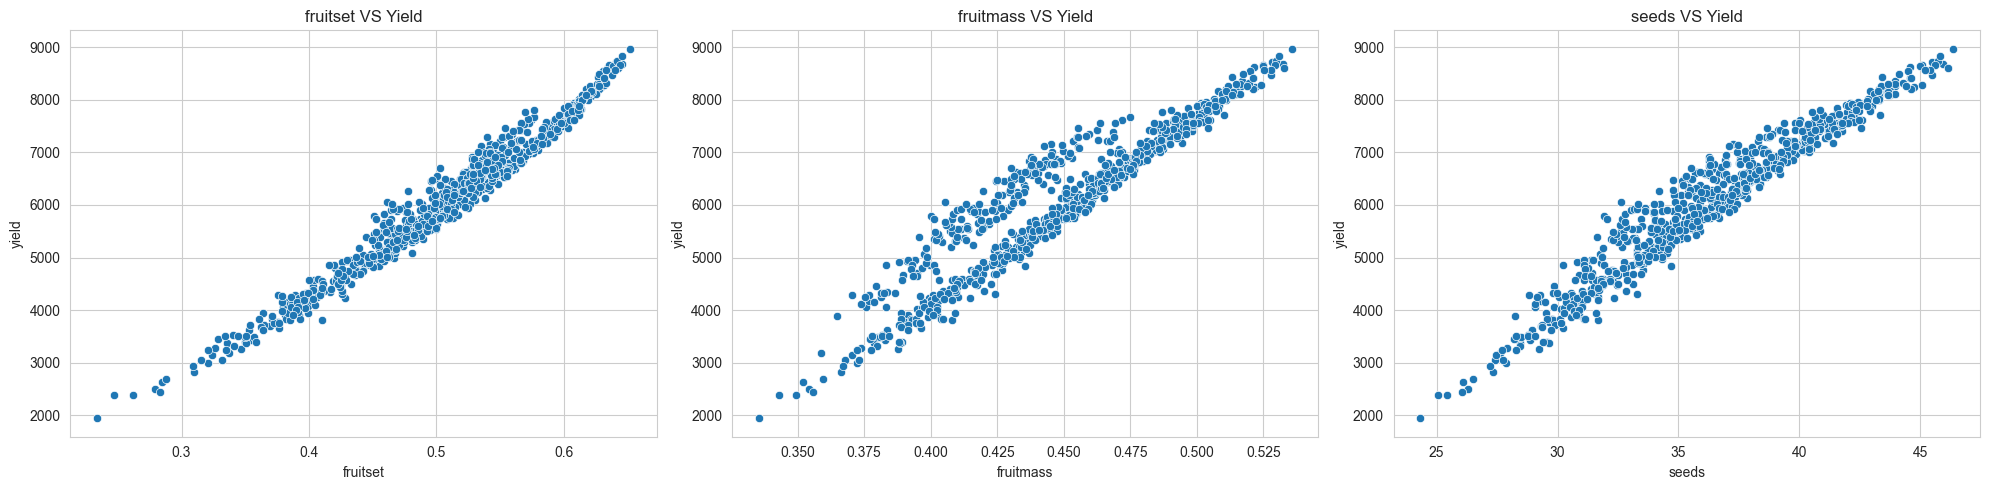

In [34]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax = ax.flatten()
new_cols = ['fruitset', 'fruitmass', 'seeds']

for i,col in enumerate(new_cols):
    sns.scatterplot(data=df,x=col,y='yield',ax=ax[i])
    ax[i].set_title(f'{col} VS Yield')
    plt.tight_layout()

plt.show()

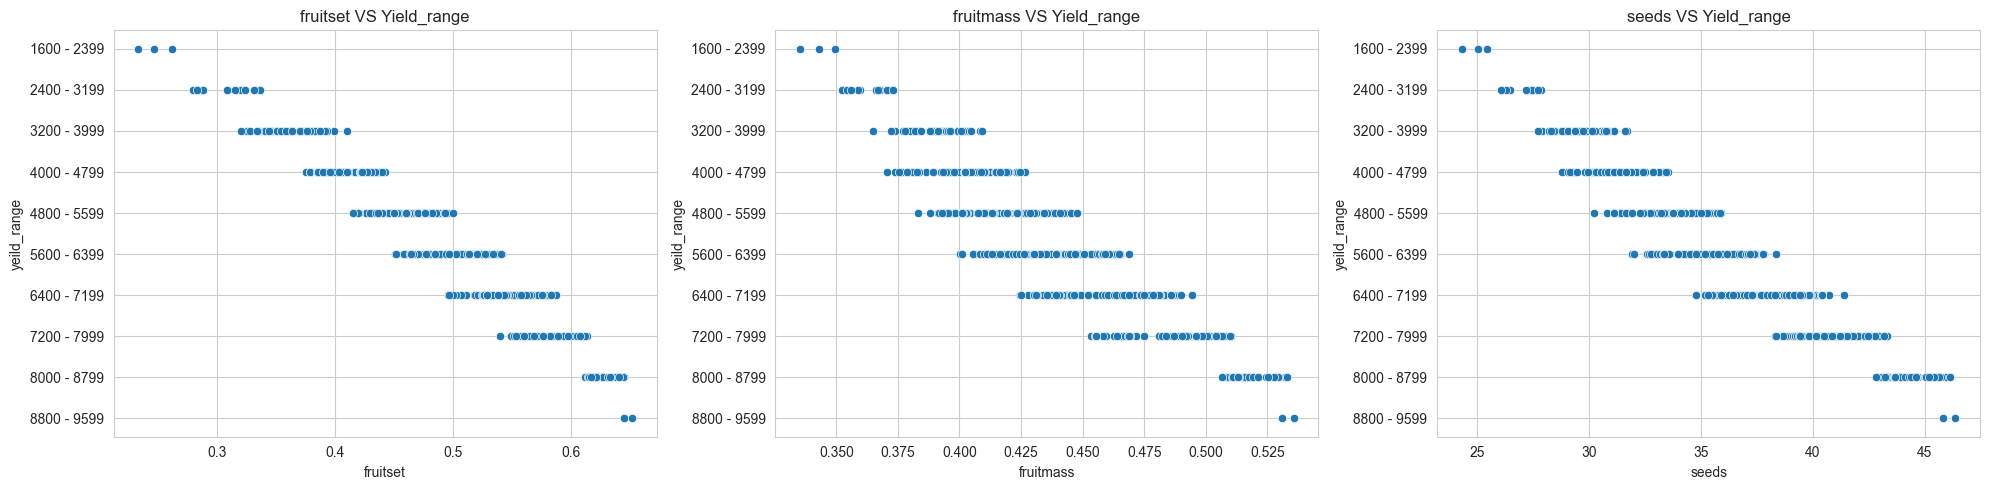

In [35]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax = ax.flatten()
new_cols = ['fruitset', 'fruitmass', 'seeds']

for i,col in enumerate(new_cols):
    sns.scatterplot(data=df,x=col,y='yeild_range',ax=ax[i])
    ax[i].set_title(f'{col} VS Yield_range')
    plt.tight_layout()

plt.show()

As observed the last three columns have a strong positive linear relation with the target column but we can't use these columns to directly predict the yield as they are results of yeild itself

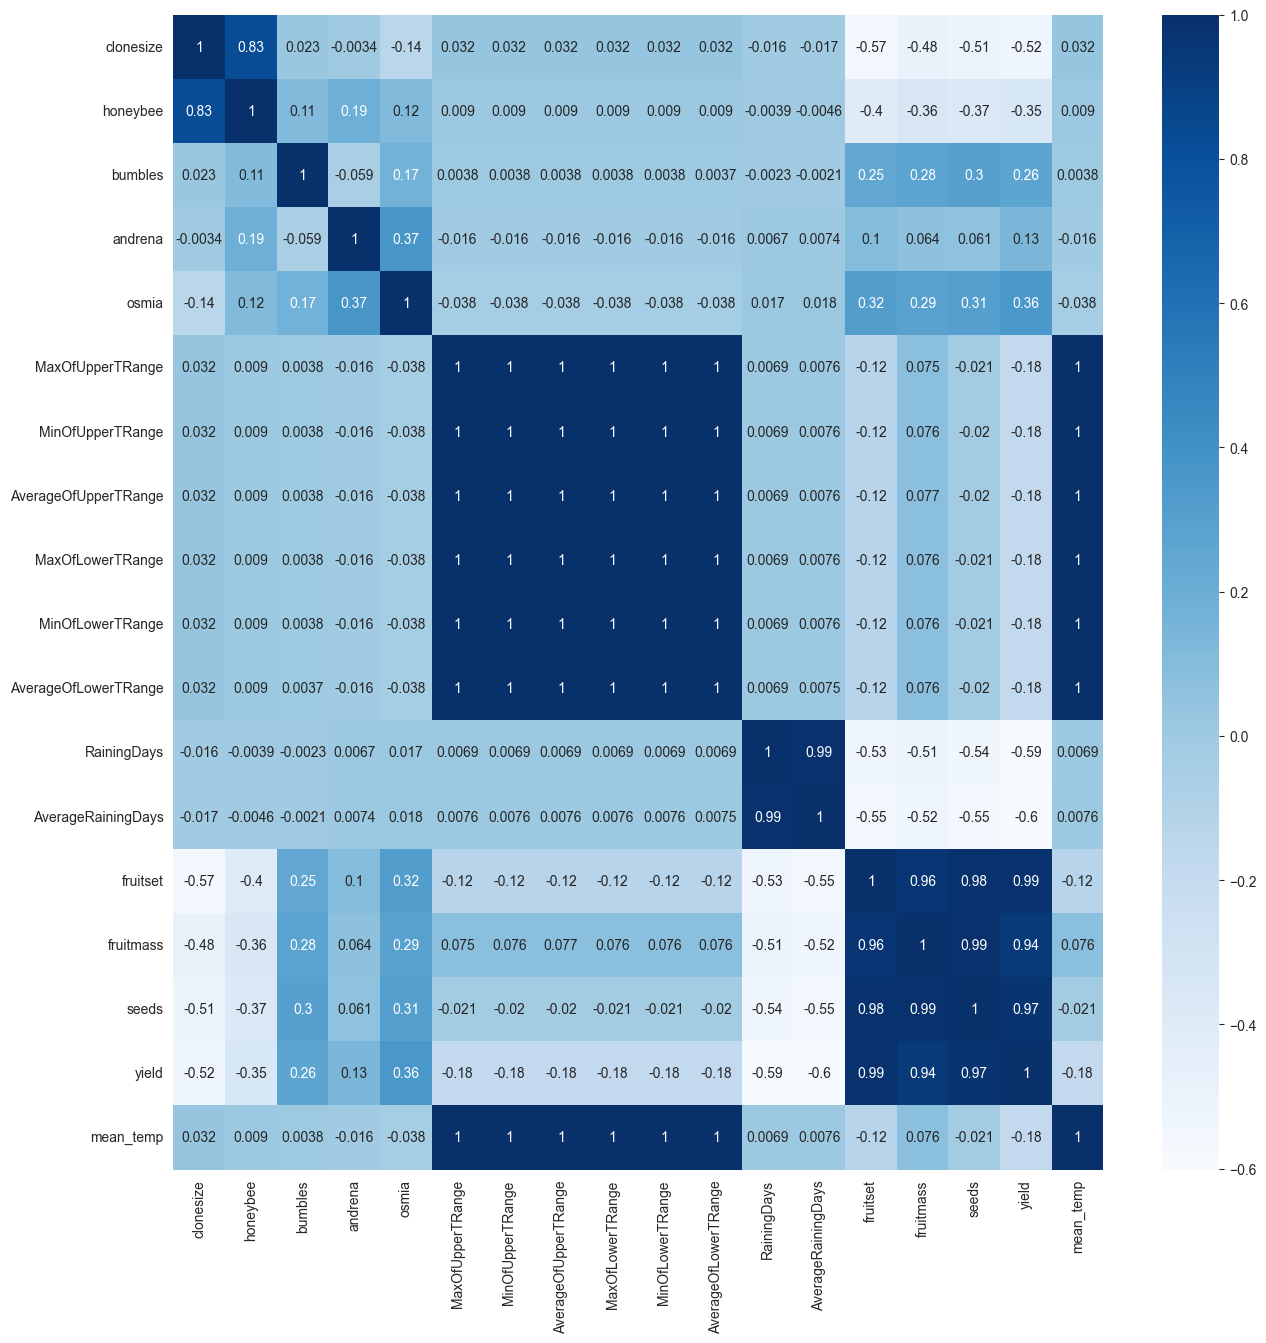

In [36]:
plt.figure(figsize=(15,15))
sns.heatmap(df.drop(columns=['Row#','yeild_range']).corr(),cmap='Blues',annot=True)
plt.show()

- The columns fruitset, fruitmass, seeds are highly positively correlated with yield 
- The columns MaxOFUpperTRange, MinOfUpperTRange, AverageOfUpperTRange, MaxOfLowerTRange, MinOFLowerTRange and AverageOfLowerTRange are highly correlated with each other 

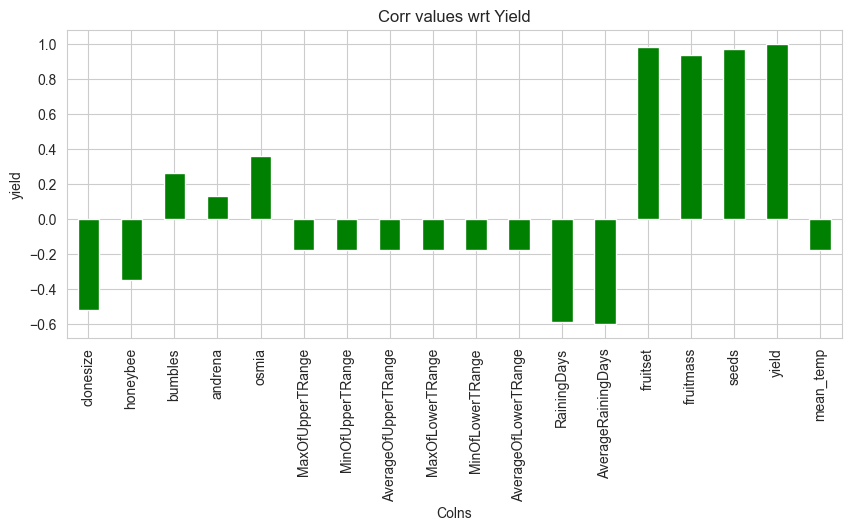

In [37]:
plt.figure(figsize=(10,4))
df_corr = df.drop(columns=['Row#','yeild_range'])
corr = df_corr.corr()['yield'].drop(columns=['yield'])
corr.plot(kind='bar', color= 'green')
plt.ylabel('yield')
plt.xlabel('Colns')
plt.title('Corr values wrt Yield')
plt.show()

- clonesize, RainingDays and AverageRainingDays have highest magnitude of -ve correlation with yield
- MaxOFUpperTRange, MinOfUpperTRange, AverageOfUpperTRange, MaxOfLowerTRange, MinOFLowerTRange and AverageOfLowerTRange all seem to have almost same magnitude of correlation with yield
- bumbles, andrena and osmia have +ve correlation with yield
- fruitset, fruitmass and seeds are all highly +vely correlated with yield